# Simulating Move scaling with loading analysis

Numbers are calculated in my c++ code where we've implemented the hungarian algorithm. Here I import the data for analysis & plotting.

In [1]:
import numpy as np
from matplotlib.pyplot import *
%matplotlib inline
import scipy.optimize as opt
import os, sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))
import Miscellaneous as misc
from fitters import linear

## functions

In [2]:
def scalingLaw(x,a,c):
    return c*x**a

In [3]:
def powerLaw(x, a, b, c):
    return c * x**a + b

In [4]:
def getSimData(fn):
    with open(fn) as f:
        lines = f.readlines()
        target_size = []
        avg_movs = []
        for l in lines:
            l_ = l.split(',')
            lf = [int(x) for x in l_]
            target_size.append(lf[0]**2)
            mn = lf[1:]
            for mn_ in mn:
                if mn == 0:
                    print('Failed!')
            avg_movs.append(np.mean(mn))    
    return target_size, avg_movs

## Number of Moves

In [172]:
ts_0p4, avgMovs_0p4 = getSimData('lr_0.4_100.csv')
ts_0p5, avgMovs_0p5 = getSimData('lr_0.5_100.csv')
ts_0p6, avgMovs_0p6 = getSimData('lr_0.6_100.csv')
ts_0p7, avgMovs_0p7 = getSimData('lr_0.7_100.csv')
ts_0p8, avgMovs_0p8 = getSimData('lr_0.8_100.csv')
ts_0p9, avgMovs_0p9 = getSimData('lr_0.9_100.csv')
ts_0p95, avgMovs_0p95 = getSimData('lr_0.95_100.csv')
ts_0p99, avgMovs_0p99 = getSimData('lr_0.99_100.csv')

In [173]:
xpts = np.linspace(0,max(target_size),1000)
param_0p4, cov = opt.curve_fit(scalingLaw, ts_0p4[5:], avgMovs_0p4[5:],p0=[1.4,0.1]);
ypts_0p4 = scalingLaw( xpts, *param_0p4 )
param_0p5, cov = opt.curve_fit(scalingLaw, ts_0p5[5:], avgMovs_0p5[5:],p0=[1.4,0.1]);
ypts_0p5 = scalingLaw( xpts, *param_0p5 )
param_0p6, cov = opt.curve_fit(scalingLaw, ts_0p6[5:], avgMovs_0p6[5:],p0=[1.4,0.1]);
ypts_0p6 = scalingLaw( xpts, *param_0p6 )
param_0p7, cov = opt.curve_fit(scalingLaw, ts_0p7[5:], avgMovs_0p7[5:],p0=[1.4,0.1]);
ypts_0p7 = scalingLaw( xpts, *param_0p7 )
param_0p8, cov = opt.curve_fit(scalingLaw, ts_0p8[5:], avgMovs_0p8[5:],p0=[1.4,0.1]);
ypts_0p8 = scalingLaw( xpts, *param_0p8 )
param_0p9, cov = opt.curve_fit(scalingLaw, ts_0p9[5:], avgMovs_0p9[5:],p0=[1.4,0.1]);
ypts_0p9 = scalingLaw( xpts, *param_0p9 )
param_0p95, cov = opt.curve_fit(scalingLaw, ts_0p95[5:], avgMovs_0p95[5:],p0=[1.4,0.1]);
ypts_0p95 = scalingLaw( xpts, *param_0p95 )
param_0p99, cov = opt.curve_fit(scalingLaw, ts_0p99[5:], avgMovs_0p99[5:],p0=[1.4,0.1]);
ypts_0p99 = scalingLaw( xpts, *param_0p99 )

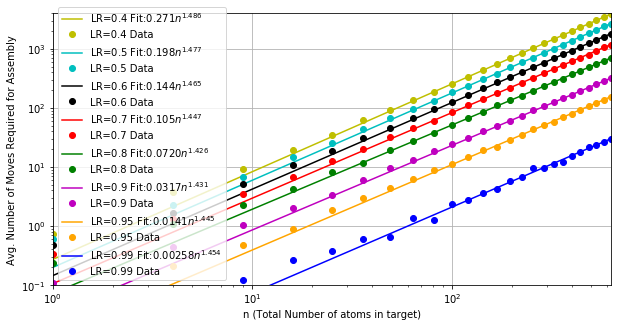

In [174]:
f, ax = subplots(figsize=(10,5))
colors = ['y','c', 'k', 'r', 'g', 'm','orange', 'b']
labels = ['0.4','0.5','0.6','0.7','0.8','0.9','0.95', '0.99']
params = [param_0p4,param_0p5, param_0p6,param_0p7,param_0p8, param_0p9,param_0p95, param_0p99]
ypts = [ypts_0p4,ypts_0p5, ypts_0p6, ypts_0p7, ypts_0p8, ypts_0p9,ypts_0p95, ypts_0p99]
avgMovs = [avgMovs_0p4,avgMovs_0p5, avgMovs_0p6, avgMovs_0p7, avgMovs_0p8, avgMovs_0p9,avgMovs_0p95, avgMovs_0p99]
ts = [ts_0p4,ts_0p5, ts_0p6, ts_0p7, ts_0p8, ts_0p9,ts_0p95, ts_0p99]
for res in zip(ypts, avgMovs, ts, colors, labels, params):
    ypts, avgMovs, ts, c, label, fitP = res
    ax.loglog(xpts,ypts,color=c,label='LR=' + label + ' Fit:$'+
           misc.round_sig_str(fitP[1])+'n^{'+misc.round_sig_str(fitP[0],4) + '}$')
    ax.loglog(ts, avgMovs, color=c, label='LR=' + label + ' Data', marker='o', linestyle='')
ax.set_xlabel('n (Total Number of atoms in target)')
ax.set_ylabel('Avg. Number of Moves Required for Assembly')
ax.set_xlim(1,max(target_size))
ax.set_ylim(0.1, 4000)
ax.grid()
ax.legend();

## Coefficients & Exponents

Text(0,0.5,'$\\alpha$')

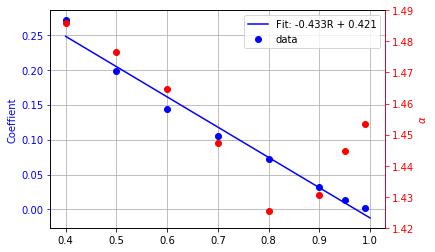

In [178]:
coeffs = [p[1] for p in params]
lrs = [0.4,0.5, 0.6, 0.7, 0.8, 0.9,0.95,0.99]
exps = [p[0] for p in params]
fitp, cov = opt.curve_fit(linear.f, lrs, coeffs)
xpts = np.linspace(0.4,1,1000)
ypts = linear.f( xpts, *fitp )
f, ax = subplots()
ax.plot(xpts,ypts,'b',label='Fit: '+misc.round_sig_str(fitp[0]) + 'R + '+ misc.round_sig_str(fitp[1]))
ax.plot(lrs,coeffs,'ob',label='data')
ax.legend()
ax.spines['right'].set_color('b')
ax.tick_params(axis='y', colors='b')
ax.yaxis.label.set_color('b')
ax.grid()
ax.set_ylabel('Coeffient')
ax2 = ax.twinx()
ax2.plot(lrs,exps,'or')
ax2.set_ylim(1.42,1.49)
ax2.spines['right'].set_color('red')
ax2.tick_params(axis='y', colors='red')
ax2.yaxis.label.set_color('red')
ax2.set_ylabel(r'$\alpha$')